<div style="font-family: Arial, Helvetica, sans-serif;">
    <div style="display: flex;padding-top: 20px">
        <div><strong>Course:</strong> Introduction to Data Science</div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Class:</strong> KHDL1</div>
        <div></div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Group:</strong> 11 - HAHA</div>
    </div>
    <div>
        <div style="display: flex;padding-top: 20px">
            <div style="padding-right: 10px;"><strong>Members:</strong></div>
            <div></div>
        </div>
        <table style="font-size: 15px; display:flex;padding-top: 20px">
            <tr>
                <th>No.</th>
                <th>Student ID</th>
                <th>Name</th>
            </tr>
            <tr>
                <td>1</td>
                <td>22127008</td>
                <td style="text-align:left;">Đặng Châu Anh</td>
            </tr>
            <tr>
                <td>2</td>
                <td>22127014</td>
                <td style="text-align:left;">Nguyễn Kim Anh</td>
            </tr>
            <tr>
                <td>3</td>
                <td>22127147</td>
                <td style="text-align:left;">Đỗ Minh Huy</td>
            </tr>
            <tr>
                <td>4</td>
                <td>22127170</td>
                <td style="text-align:left;">Trần Dịu Huyền</td>
            </tr>
        </table>
    </div>
    <div style="font-size: 25px ;font-weight: 800; text-align: center;padding-top: 20px;">FINAL PROJECT</div>
    <div style="font-size: 20px ;font-weight: 800; text-align: center;padding-top: 20px;">SPOTIFY 2024 REWIND - DATA MODELING</div>
</div>

# **Table of content**
1. [Import package](#1)
2. [Load data](#2)
3. [Data preprocessing](#3)

    3.1. [Feature Selection and Feature Engineering](#3.1)
    
    3.2. [Encoding Categorical Variables](#3.2)

    3.3. [Data normalization](#3.3)

    3.4. [Sample selection](#3.4)
    
4. [Data modeling](#data-modeling)

    4.1. [Linear regression](#linear-regression)

    4.2. [Bagging](#bagging)

    4.3. [XG-Boost](#xg-boost)

    4.4. [Random Forest](#random-forest)

5. [Evaluation](#evaluation)

# **Import packages**
<a id="1"></a>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# **Load data**
<a id="2"></a>
Read data from csv data files in folder `spotify_charts_cleaned_final` into a DataFrame.


In [2]:
df = pd.read_csv('cleaned_data/spotify_charts_cleaned_final.csv')
df.sample(5)

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,month,release_date,duration,rank_history
1525,126,2kauMp3YNHXULGXyJh4321,"Wren Evans, itsnk",Phóng Đổ Tim Em,Universal Music Indochina,9,118,38,174458,8,2023-12-17,134.0,"[('2023/12/21', 40), ('2023/12/28', 10), ('202..."
123,124,59LeatGytui1mQleoiEnWM,"Wren Evans, itsnk",Việt Kiều,Universal Music Indochina,57,127,9,156269,1,2023-12-17,171.0,"[('2023/06/01', 99), ('2023/06/08', 106), ('20..."
1167,168,72ictTz6o0dusD2QpCn4bn,"Wxrdie, Andree Right Hand, Machiot",TETVOVEN,M Music Records,39,144,31,128572,6,2023-12-03,197.0,"[('2023/12/07', 107), ('2023/12/14', 50), ('20..."
1447,48,5ECHJ1llWBNYLVCYrllD3x,"Da LAB, Phương Ly",Chạy Khỏi Thế Giới Này,LOOPS Music,11,45,114,301880,8,2022-06-30,255.0,"[('2022/07/07', 17), ('2022/07/14', 11), ('202..."
1619,20,3ZbZtdEw9U0uZW4tZItIwq,"RHYDER, CoolKid, BAN",Chịu Cách Mình Nói Thua,RHYDER,6,20,45,563526,9,2023-11-22,182.0,"[('2023/11/30', 7), ('2023/12/07', 6), ('2023/..."


# **Data Preprocessing**
<a id="3"></a>
Data is already cleaned, so we don't need to clean it again. We will do some preprocessing steps to prepare data for modeling.

## **Feature Selection and Feature Engineering**
<a id="3.1"></a>

For the purpose of this project, we will drop out unnecessary columns and keep only the columns that are useful for modeling. So as the first step, we will drop out the unnecessary columns: `source`. Because in Vietnam, we have too many music sources, and it is not necessary to keep this column.


In [ ]:
df = df.drop(columns=['source'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            2000 non-null   int64  
 1   uri             2000 non-null   object 
 2   artist_names    2000 non-null   object 
 3   track_name      2000 non-null   object 
 4   peak_rank       2000 non-null   int64  
 5   previous_rank   2000 non-null   int64  
 6   weeks_on_chart  2000 non-null   int64  
 7   streams         2000 non-null   int64  
 8   month           2000 non-null   int64  
 9   release_date    2000 non-null   object 
 10  duration        2000 non-null   float64
 11  rank_history    2000 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 187.6+ KB


As we see in `df.info()`, `release_date` is an object type, so we need to convert it to datetime type. Moreover, we also have the first date that the rank fluctuates in `rank_history`, so we need to extract the first date from `rank_history` as the `trending_date` and convert it to datetime type.

In [4]:
def get_first_trending_date(row):
    date = row.split(', ')[0]
    date = date[2:-1]
    return date

# Convert release_date columns to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Get the first trending date and convert it to datetime
df['trending_date'] = df['rank_history'].apply(lambda x: get_first_trending_date(x))
df['trending_date'] = pd.to_datetime(df['trending_date'], format='mixed')

Before do further steps, we will check the missing values in the dataset. 

In [5]:
missing_values_trending = df['trending_date'].isna().sum()
missing_ratio_trending = missing_values_trending / len(df) * 100
print(f'Missing values for trending date: {missing_values_trending} ({missing_ratio_trending:.2f}%)')

missing_values_release = df['release_date'].isna().sum()
missing_ratio_release = missing_values_release / len(df) * 100
print(f'Missing values for release date: {missing_values_release} ({missing_ratio_release:.2f}%)')

Missing values for trending date: 163 (8.15%)
Missing values for release date: 0 (0.00%)


We found that there are some missing values in `trending_date`. We will fill them with the first date of the month of that song in `month` column for `trending_date`. Because we can't know the exact date of the song, but we can know the month of the song.

In [6]:
for index, row in df.iterrows():
    if pd.isna(row['trending_date']) or row['rank_history'] == '[]':
        trending_date = f"2024-{row['month']:02d}-01"
        df.at[index, 'trending_date'] = trending_date
        
df['trending_date'].isna().sum()

0

But we will not set two columns (`release_date` and `trending_date`) directly, we will calculate the difference between `trending_date` and `release_date` to get the `days_to_trend` column. This column will help us to know how many days it takes for a song to be on the chart after its release date. Furthermore, we will also extract the the month and year from both `release_date`, `trending_date` to get `release_month`, `release_year` and `trending_month`, `trending_year` respectively. These columns will help us to know the month and year of the release date and the trending date of a song. Moveover, we will rename the `month` column to `current_month` to avoid confusion.

In [7]:
# Convert trending_date columns to datetime
df['trending_date'] = pd.to_datetime(df['trending_date'])

# Split release_time into year, month
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

# Split trending_time into year, month
df['trending_year'] = df['trending_date'].dt.year
df['trending_month'] = df['trending_date'].dt.month

# Days to trend
df['days_to_trend'] = (df['trending_date'] - df['release_date']).dt.days

# Rename `month` column to `current_month`
df = df.rename(columns={'month': 'current_month'})

And, this is the final dataset after feature selection.

In [8]:
df.info()
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   rank            2000 non-null   int64         
 1   uri             2000 non-null   object        
 2   artist_names    2000 non-null   object        
 3   track_name      2000 non-null   object        
 4   peak_rank       2000 non-null   int64         
 5   previous_rank   2000 non-null   int64         
 6   weeks_on_chart  2000 non-null   int64         
 7   streams         2000 non-null   int64         
 8   current_month   2000 non-null   int64         
 9   release_date    2000 non-null   datetime64[ns]
 10  duration        2000 non-null   float64       
 11  rank_history    2000 non-null   object        
 12  trending_date   2000 non-null   datetime64[ns]
 13  release_year    2000 non-null   int32         
 14  release_month   2000 non-null   int32         
 15  tren

,rank,uri,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams,current_month,release_date,duration,rank_history,trending_date,release_year,release_month,trending_year,trending_month,days_to_trend
451,52,28bxbqNcAuNxYDZYet6eZ7,"RPT MCK, tlinh",Chỉ Một Đêm Nữa Thôi,9,54,57,279014,3,2023-03-02,142.0,"[('2023/03/09', 9), ('2023/03/16', 16), ('2023...",2023-03-09,2023,3,2023,3,7
786,187,68EMU2RD1ECNeOeJ5qAXCV,"Charlie Puth, Selena Gomez",We Don't Talk Anymore (feat. Selena Gomez),71,-1,196,124738,4,2015-11-05,218.0,"[('2016-02-11', 61), ('2017-08-31', 61), ('202...",2016-02-11,2015,11,2016,2,98
859,60,2kauMp3YNHXULGXyJh4321,"Wren Evans, itsnk",Phóng Đổ Tim Em,9,54,25,213868,5,2023-12-17,134.0,"[('2023/12/21', 40), ('2023/12/28', 10), ('202...",2023-12-21,2023,12,2023,12,4
885,86,6jcLKVmEKAQIXIVHJZ8vzS,"MONSTAR, GREY D, NICKY, VƯƠNG BÌNH",tình yêu chậm trễ,46,85,78,184200,5,2021-08-01,245.0,"[('2022/12/15', 149), ('2022/12/22', 74), ('20...",2022-12-15,2021,8,2022,12,501
584,185,5YiqPAVbiFUj1G1qvbXo0X,Chillies,Giấc Mơ Khác,14,-1,56,127908,3,2023-02-09,223.0,"[('2023/02/16', 14), ('2023/02/23', 22), ('202...",2023-02-16,2023,2,2023,2,7


There are some abnormal in `days_to_trend` column (negative values). We will find out how many rows have negative values in `days_to_trend` column.

In [9]:
# Check negative values in days_to_trend
negative_days_to_trend = df[df['days_to_trend'] < 0]
neg_days_ratio = len(negative_days_to_trend) / len(df) * 100

print(f'Negative values in days_to_trend: {len(negative_days_to_trend)}')
print(f'Percentage of negative values in days_to_trend: {neg_days_ratio:.2f}%')
negative_days_to_trend.head()

Negative values in days_to_trend: 197
Percentage of negative values in days_to_trend: 9.85%


,rank,uri,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams,current_month,release_date,duration,rank_history,trending_date,release_year,release_month,trending_year,trending_month,days_to_trend
0,1,2HRgqmZQC0MC7GeNuDIXHN,"Jung Kook, Latto",Seven (feat. Latto) (Explicit Ver.),1,1,29,1178606,1,2023-11-03,184.0,"[('2023/07/20', 1), ('2023/07/27', 1), ('2023/...",2023-07-20,2023,11,2023,7,-106
1,2,4qYfRfSxsmhJ1WMaywtLyI,"Wren Evans, itsnk",Từng Quen,1,2,14,1087520,1,2023-12-17,175.0,"[('2023/11/02', 2), ('2023/11/09', 2), ('2023/...",2023-11-02,2023,12,2023,11,-45
14,15,7jLSThU5Kg1RWt19Leiaxm,"RPT MCK, Trung Trần",Chìm Sâu,1,16,101,582379,1,2023-03-02,156.0,"[('2022/03/03', 5), ('2022/03/10', 3), ('2022/...",2022-03-03,2023,3,2022,3,-364
16,17,4exlWP8cokkWVCvyP3kg7c,"tlinh, 2pillz",nếu lúc đó,1,20,48,540375,1,2023-08-16,264.0,"[('2023/03/09', 1), ('2023/03/16', 1), ('2023/...",2023-03-09,2023,8,2023,3,-160
26,27,0hhF4SJHEosOwZ7gbjgmbf,HIEUTHUHAI,Không Thể Say,7,37,41,439098,1,2023-10-16,228.0,"[('2023/04/27', 9), ('2023/05/04', 7), ('2023/...",2023-04-27,2023,10,2023,4,-172


We can see that the reason for the negative values in `days_to_trend` column is that the `trending_date` is before the `release_date`. We will handle the negative values in `days_to_trend` column by setting the `trending_date` based on the `rank_history` at the time that suitable to the `release_date` and then calculate the `days_to_trend` column again.

In [10]:
def extract_suitable_date(rank_history, release_date):
    date_rank = eval(rank_history)
    # Split the date and rank
    dates = [date for date, rank in date_rank]  
    for date in dates:
        if pd.to_datetime(date) >= release_date:
            return date
    return release_date

# Extract the suitable date
for index, row in df.iterrows():
    if row['days_to_trend'] < 0:
        suitable_date = extract_suitable_date(row['rank_history'], row['release_date'])
        df.at[index, 'trending_date'] = suitable_date

# Convert 'trending_date' to datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')

# Calculate 'days_to_trend'
df['days_to_trend'] = (df['trending_date'] - df['release_date']).dt.days

# Extract year and month from release_date and trending_date
df['trending_year'] = df['trending_date'].dt.year
df['trending_month'] = df['trending_date'].dt.month

Revise the dataset after handling the negative values in `days_to_trend` column to ensure there are no missing values in the dataset.

In [11]:
# Fill missing values
nan_values = df.isna().sum()
print("Missing values in each column:")
print(nan_values[nan_values > 0])

# Display the rows with missing values
missing_values = df[df.isna().any(axis=1)]
missing_values

Missing values in each column:
Series([], dtype: int64)


,rank,uri,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams,current_month,release_date,duration,rank_history,trending_date,release_year,release_month,trending_year,trending_month,days_to_trend


Check datatypes of each columns again to make sure that all columns have the correct datatype.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   rank            2000 non-null   int64         
 1   uri             2000 non-null   object        
 2   artist_names    2000 non-null   object        
 3   track_name      2000 non-null   object        
 4   peak_rank       2000 non-null   int64         
 5   previous_rank   2000 non-null   int64         
 6   weeks_on_chart  2000 non-null   int64         
 7   streams         2000 non-null   int64         
 8   current_month   2000 non-null   int64         
 9   release_date    2000 non-null   datetime64[ns]
 10  duration        2000 non-null   float64       
 11  rank_history    2000 non-null   object        
 12  trending_date   2000 non-null   datetime64[ns]
 13  release_year    2000 non-null   int32         
 14  release_month   2000 non-null   int32         
 15  tren

As we see in `df.info()`, we can change the `current_month` column to category type because they are ordinal data and have a limited number of unique values.

In [13]:
df['current_month'] = df['current_month'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   rank            2000 non-null   int64         
 1   uri             2000 non-null   object        
 2   artist_names    2000 non-null   object        
 3   track_name      2000 non-null   object        
 4   peak_rank       2000 non-null   int64         
 5   previous_rank   2000 non-null   int64         
 6   weeks_on_chart  2000 non-null   int64         
 7   streams         2000 non-null   int64         
 8   current_month   2000 non-null   object        
 9   release_date    2000 non-null   datetime64[ns]
 10  duration        2000 non-null   float64       
 11  rank_history    2000 non-null   object        
 12  trending_date   2000 non-null   datetime64[ns]
 13  release_year    2000 non-null   int32         
 14  release_month   2000 non-null   int32         
 15  tren

All datatypes are correct. Finally, we will drop out the `uri`, `release_date`, `trending date`, `artist_names`, `track_name` and `rank_history` columns because we don't need them anymore.

In [14]:
df = df.drop(columns=['uri', 'release_date', 'trending_date', 'rank_history', 'artist_names', 'track_name'])

And, this is the final dataset after feature selection.

In [15]:
df.sample(5)

,rank,peak_rank,previous_rank,weeks_on_chart,streams,current_month,duration,release_year,release_month,trending_year,trending_month,days_to_trend
324,125,61,124,9,146529,2,242.0,2023,12,2024,1,4
647,48,3,44,11,269949,4,250.0,2024,2,2024,2,8
1837,38,38,-1,1,423305,10,239.0,2024,10,2024,10,8
883,84,62,80,10,184607,5,328.0,2023,3,2024,4,398
342,143,143,-1,1,137295,2,185.0,2024,1,2024,2,29


In [16]:
df.to_csv('cleaned_data/before_encode.csv', index=False)

## **Encoding Categorical Variables**
<a id="3.2"></a>
As we already know, the dataset contains some categorical columns. We need to encode them to numerical values to use them in the model. We will use the one-hot encoding technique to encode the categorical columns. Let's check the categorical columns in the dataset again.

In [17]:
# Find categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)
df.info()

Categorical columns: ['current_month']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            2000 non-null   int64  
 1   peak_rank       2000 non-null   int64  
 2   previous_rank   2000 non-null   int64  
 3   weeks_on_chart  2000 non-null   int64  
 4   streams         2000 non-null   int64  
 5   current_month   2000 non-null   object 
 6   duration        2000 non-null   float64
 7   release_year    2000 non-null   int32  
 8   release_month   2000 non-null   int32  
 9   trending_year   2000 non-null   int32  
 10  trending_month  2000 non-null   int32  
 11  days_to_trend   2000 non-null   int64  
dtypes: float64(1), int32(4), int64(6), object(1)
memory usage: 156.4+ KB


It seems that we have set the categorical columns correctly. Now, we will use the one-hot encoding technique to encode the categorical columns.

In [18]:
# df = pd.get_dummies(df, columns=categorical_columns)
# df.sample(5)

## **Data normalization**
<a id="3.3"></a>
We will normalize the numerical columns in the dataset to make the data more consistent and easier to train the model. Before normalizing the data, we revise the outliers in the dataset to decide what method we will use to normalize the data.

In [19]:
# Handle outliers using IQR
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Propotion of outliers
outliers = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)
outliers_ratio = outliers.mean() * 100
print("Outliers ratio:")
outliers_ratio

Outliers ratio:


rank               0.00
peak_rank          5.35
previous_rank      0.00
weeks_on_chart     2.45
streams            7.35
duration           0.35
release_year       5.45
release_month      0.00
trending_year      2.80
trending_month     0.00
days_to_trend     16.00
dtype: float64

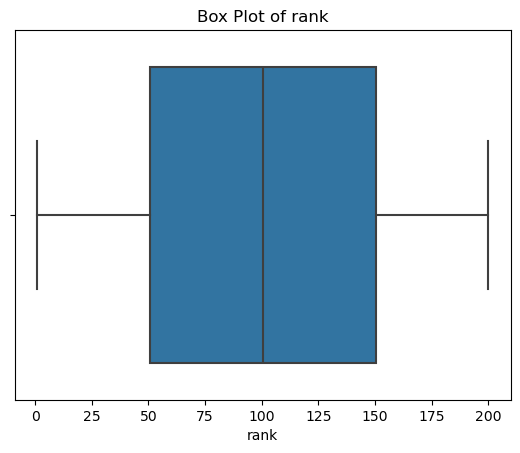

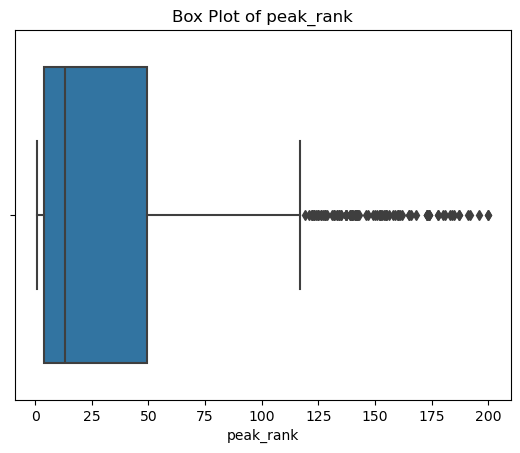

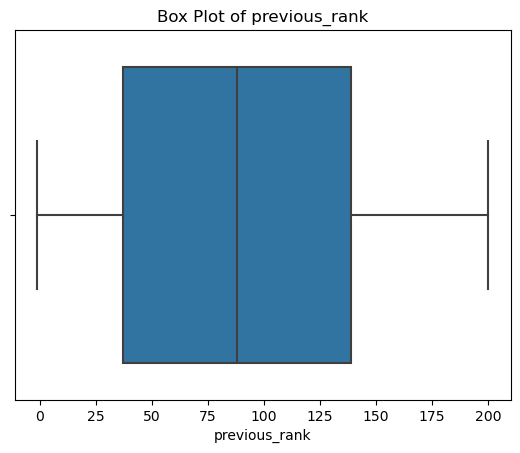

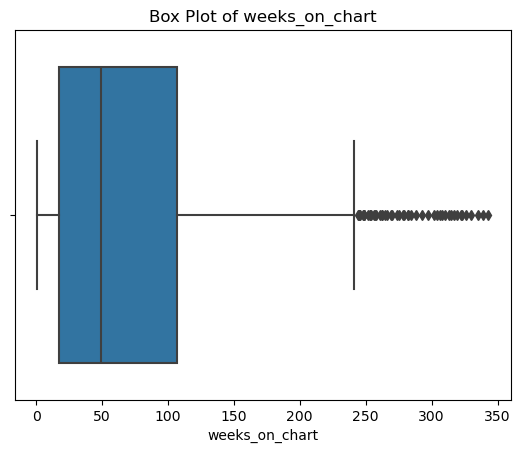

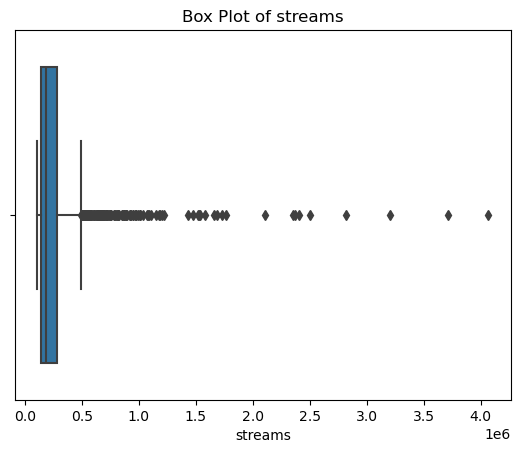

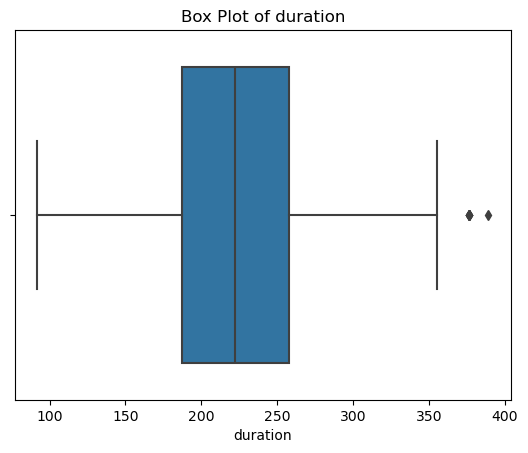

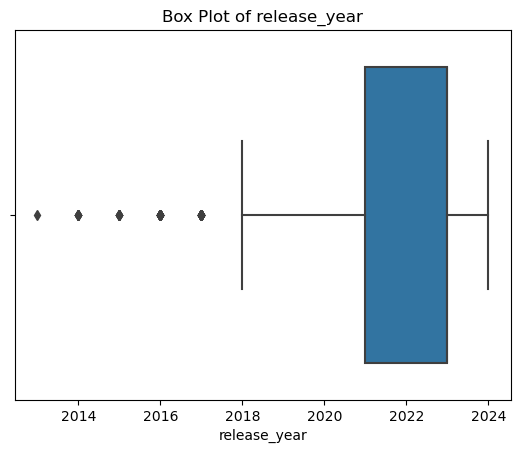

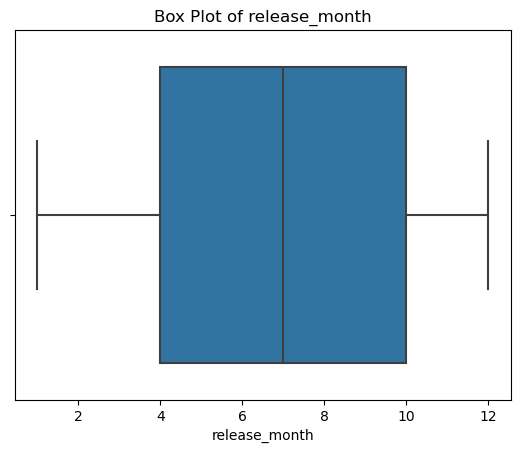

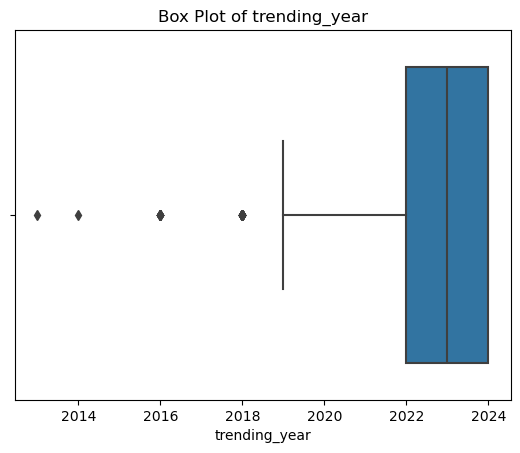

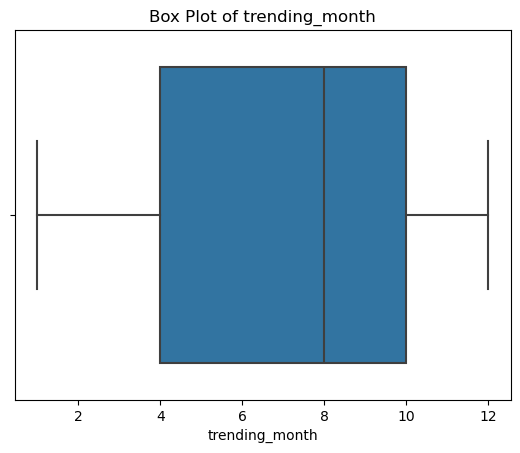

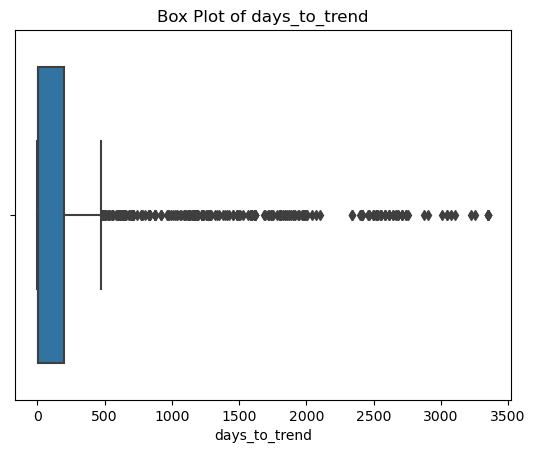

In [20]:
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

As we see, the dataset contains many outliers, especially in the `days_to_trend` column. We will Z-score normalization to normalize the data cause Z-score normalization is not sensitive to outliers. We just need to normalize the numerical columns because the categorical columns have been used one-hot encoding technique to encode them, so they are in the range [0, 1].

In [21]:
standard_scaler = StandardScaler()
df_cleaned = pd.DataFrame(standard_scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)
df_cleaned = pd.concat([df_cleaned, df.drop(columns=numerical_columns)], axis=1)
df_cleaned.sample(5)

,rank,peak_rank,previous_rank,weeks_on_chart,streams,duration,release_year,release_month,trending_year,trending_month,days_to_trend,current_month
1243,-0.978621,-0.630212,-1.390309,-1.012864,0.146251,-0.326484,1.003777,-0.047036,0.889855,-0.033568,-0.441959,7
1680,-0.337754,-0.779669,-0.154712,-0.621318,-0.104130,-1.563801,1.003777,-1.197775,0.889855,-1.227101,-0.441959,9
560,1.047904,3.205861,-1.525717,-1.027366,-0.473566,2.211065,0.528729,-1.197775,0.889855,-0.928718,0.207664,3
1835,-1.117187,0.092165,0.048400,-1.012864,0.690736,-0.829800,1.003777,0.816018,0.889855,0.861582,-0.446931,10
466,-0.580244,-0.754760,-0.357824,0.219781,-0.141334,0.239746,0.053680,-0.047036,-0.418274,0.861582,-0.296125,3


## **Sample selection**
<a id="3.4"></a>
Before modeling, we will split the dataset into training and testing sets. We will use 70% of the data for training and 30% for testing. We will use the `train_test_split` function from the `sklearn.model_selection` module to split the dataset. But to avoid the bias in the dataset, we will suffle the dataset.

Our prediction target is `streams`, so we will split the dataset into two parts: `X` and `y`. `X` contains all columns except for the `streams` column, and `y` contains the `streams` column.

In [22]:
# Feature and target
X = df_cleaned.drop(columns=['streams'])
y = df_cleaned['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1400, 11)
Testing set shape: (600, 11)


# **Data Modeling**
<a id="4"></a>

## **Linear Regression**
<a id="4.1"></a>
We start by importing the necessary libraries and defining the **Linear Regression** model as our base estimator.

In [23]:
lin_reg = LinearRegression()

The hyperparameters for Linear Regression are relatively simple:

- `fit_intercept`: Determines if the model should calculate the intercept.
- `positive`: Ensures that coefficients are non-negative when set to *True*.

To explore all possible combinations of these hyperparameters, we use `GridSearchCV`, which performs an exhaustive search over the defined grid. A k-fold cross-validation ensures the model's performance is consistent across different subsets of the data.

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

linreg_grid_search = GridSearchCV(
    estimator=lin_reg, 
    param_grid=param_grid, 
    cv=5,           # 5-fold cross-validation
    n_jobs=-1,      # Use all available cores
    verbose=1       # Print progress
)

time_start = time.time()
linreg_grid_search.fit(X_train, y_train)
time_end = time.time()
linreg_time = time_end - time_start

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Once the `RandomizedSearchCV` process is complete, we retrieve the best hyperparameters and the corresponding model. The model is then used to make predictions on the test set, and the **R² score** is calculated to evaluate its performance.

In [25]:
best_linreg_params = linreg_grid_search.best_params_
best_linreg_model = linreg_grid_search.best_estimator_

y_pred = best_linreg_model.predict(X_test)

print("Best parameters for Linear Regression:", best_linreg_params)
print("Linear Regression Training Time:", linreg_time)
print("Linear Regression Accuracy (R² score):", r2_score(y_test, y_pred))

Best parameters for Linear Regression: {'fit_intercept': True, 'positive': False}
Linear Regression Training Time: 5.115477085113525
Linear Regression Accuracy (R² score): 0.32553431430707347


To better understand the alignment between true and predicted values, we compute the ranks of the true and predicted outputs and plot them.

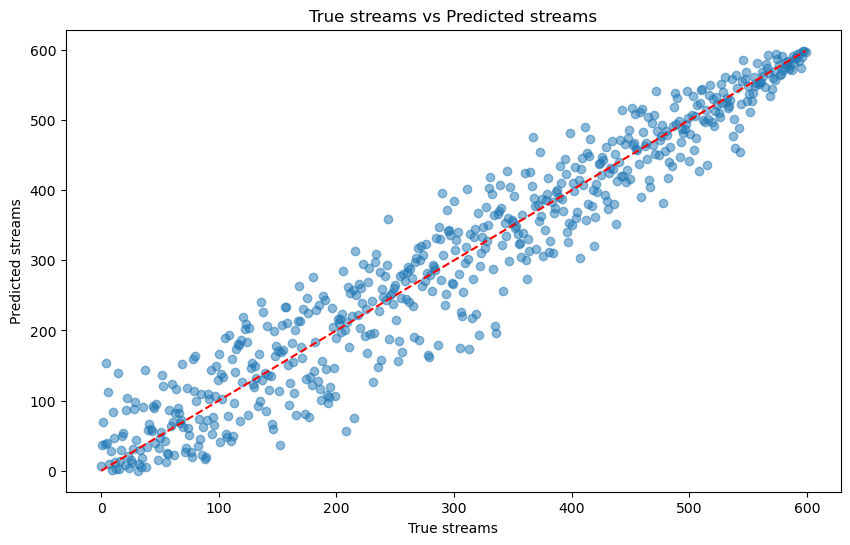

In [26]:
true_streams = np.argsort(np.argsort(y_test))
pred_streams = np.argsort(np.argsort(y_pred))

plt.figure(figsize=(10, 6))
plt.scatter(true_streams, pred_streams, alpha=0.5)
plt.plot([min(true_streams), max(true_streams)], [min(true_streams), max(true_streams)], color='red', linestyle='--')
plt.xlabel('True streams')
plt.ylabel('Predicted streams')
plt.title('True streams vs Predicted streams')
plt.show()

## **Bagging**
<a id="4.2"></a>
First we will initialize the base estimator as a decision tree and initialize the bagging model.

In [27]:
# Base estimator
dtree = DecisionTreeRegressor(random_state=42)
bagging_model = BaggingRegressor(base_estimator=dtree)

Then, we will define the hyperparameters for the bagging model and using `RandomizedSearchCV` to find the best hyperparameters for the model. After that, we will train the model with the best hyperparameters.

In [28]:
param_grid = {
    'base_estimator__max_depth': [None, 10, 20, 30, 40, 50],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

bagging_random_search = RandomizedSearchCV(estimator=bagging_model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)
time_start = time.time()
bagging_random_search.fit(X_train, y_train)
time_end = time.time()
bagging_time = time_end - time_start
best_bagging_params, best_bagging_model = bagging_random_search.best_params_, bagging_random_search.best_estimator_

# Predict the target
y_pred = best_bagging_model.predict(X_test)

print("Best parameters for Bagging Regressor:", best_bagging_params)
print("Bagging Regressor Training Time:", bagging_time)
print("Bagging Regressor Accuracy:", best_bagging_model.score(X_test, y_test))

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for Bagging Regressor: {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 1.0, 'bootstrap_features': False, 'bootstrap': True, 'base_estimator__min_samples_split': 10, 'base_estimator__min_samples_leaf': 2, 'base_estimator__max_depth': 50}
Bagging Regressor Training Time: 6.574315786361694
Bagging Regressor Accuracy: 0.844638662046592


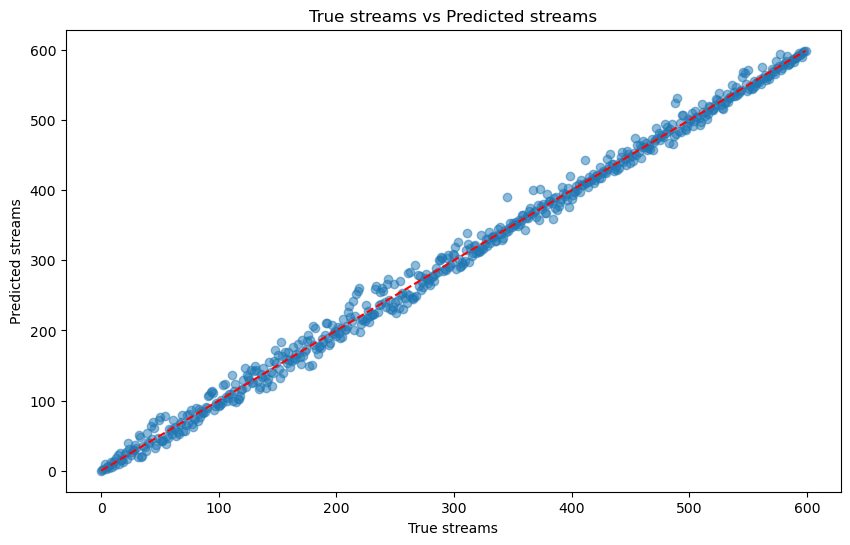

In [29]:
# Calculate the streams of the true and predicted values
true_streams = np.argsort(np.argsort(y_test))
pred_streams = np.argsort(np.argsort(y_pred))

# Plot true streams vs predicted streams
plt.figure(figsize=(10, 6))
plt.scatter(true_streams, pred_streams, alpha=0.5)
plt.plot([min(true_streams), max(true_streams)], [min(true_streams), max(true_streams)], color='red', linestyle='--')
plt.xlabel('True streams')
plt.ylabel('Predicted streams')
plt.title('True streams vs Predicted streams')
plt.show()

In [30]:
# # Calculate the ranks of the true and predicted values
# true_ranks = np.argsort(np.argsort(y_test))
# pred_ranks = np.argsort(np.argsort(y_pred))

# # Plot true ranks vs predicted ranks
# plt.figure(figsize=(10, 6))
# plt.scatter(true_ranks, pred_ranks, alpha=0.5)
# plt.plot([min(true_ranks), max(true_ranks)], [min(true_ranks), max(true_ranks)], color='red', linestyle='--')
# plt.xlabel('True Ranks')
# plt.ylabel('Predicted Ranks')
# plt.title('True Ranks vs Predicted Ranks')
# plt.show()

## **XG-Boost**
<a id="4.3"></a>

 Initialize Gradient Boosting Regression 

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boost = GradientBoostingRegressor(random_state=42)

Gradient Boosting Hyperparameter Tuning

In [32]:
param_grid = {
    'loss': ['squared_error', 'absolute_error'],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [10, 50, 100, 200],
    'min_samples_split' : [2, 4, 6],
    'min_samples_leaf': [1,2,3,4],
    'max_features': [0.5, 0.7, 1.0]
}

gradient_boost_random_search = RandomizedSearchCV(estimator=gradient_boost, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, random_state=42)
time_start = time.time()
gradient_boost_random_search.fit(X_train, y_train)
time_end = time.time()
gradient_boost_time = time_end - time_start
best_gradient_boost_params, best_gradient_boost_model = gradient_boost_random_search.best_params_, gradient_boost_random_search.best_estimator_

# Predict the target
y_pred = best_gradient_boost_model.predict(X_test)

print("Best parameters for Gradient Boost Regressor:", best_gradient_boost_params)
print("Gradient Boost Regressor Training Time:", gradient_boost_time)
print("Gradient Boost Regressor Accuracy:", best_gradient_boost_model.score(X_test, y_test))

Best parameters for Gradient Boost Regressor: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 0.5, 'loss': 'squared_error', 'learning_rate': 0.1}
Gradient Boost Regressor Training Time: 35.59925293922424
Gradient Boost Regressor Accuracy: 0.8938551452638147


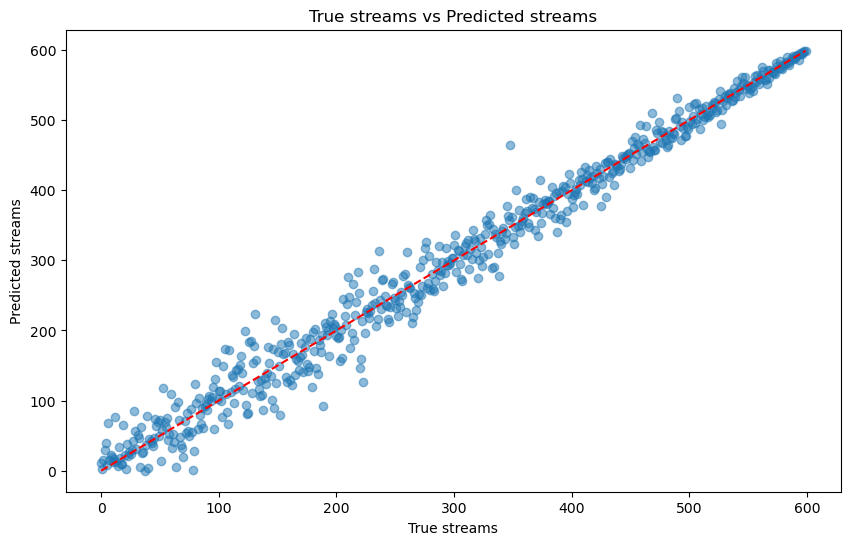

In [33]:
# Calculate the streams of the true and predicted values
true_streams = np.argsort(np.argsort(y_test))
pred_streams = np.argsort(np.argsort(y_pred))

# Plot true streams vs predicted streams
plt.figure(figsize=(10, 6))
plt.scatter(true_streams, pred_streams, alpha=0.5)
plt.plot([min(true_streams), max(true_streams)], [min(true_streams), max(true_streams)], color='red', linestyle='--')
plt.xlabel('True streams')
plt.ylabel('Predicted streams')
plt.title('True streams vs Predicted streams')
plt.show()

## **Random forest**
<a id="4.4"></a>

Initialize the Random Forest Regressor model with a fixed random state for reproducibility

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

In this section, we perform hyperparameter tuning for the `RandomForestRegressor` using `RandomizedSearchCV`. This approach allows us to randomly sample from a grid of hyperparameters and select the best combination based on cross-validation performance. After that, we evaluate the performance of different hyperparameter combinations using 5-fold cross-validation.

In [35]:
# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 300],    
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_samples': [0.1, 0.5, 1.0],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True],
    'max_samples': [0.5, 0.8, 1.0],
    'criterion': ['squared_error', 'absolute_error']
}


# Perform Randomized Search Cross-Validation
rf_random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_grid, 
    n_iter=20,  
    cv=5,
    n_jobs=-1,  
    random_state=42
)


# Measure training time
time_start = time.time()
rf_random_search.fit(X_train, y_train)
time_end = time.time()
rf_training_time = time_end - time_start

best_rf_params, best_rf_model = rf_random_search.best_params_, rf_random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

print("Best parameters for Random Forest:", best_rf_params)
print("Random Forest Training Time:", rf_training_time)
print("Ramdom Forest Accuracy:", best_rf_model.score(X_test, y_test))

Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_samples': 1.0, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'absolute_error', 'bootstrap': True}
Random Forest Training Time: 96.25930690765381
Ramdom Forest Accuracy: 0.8082618531120563


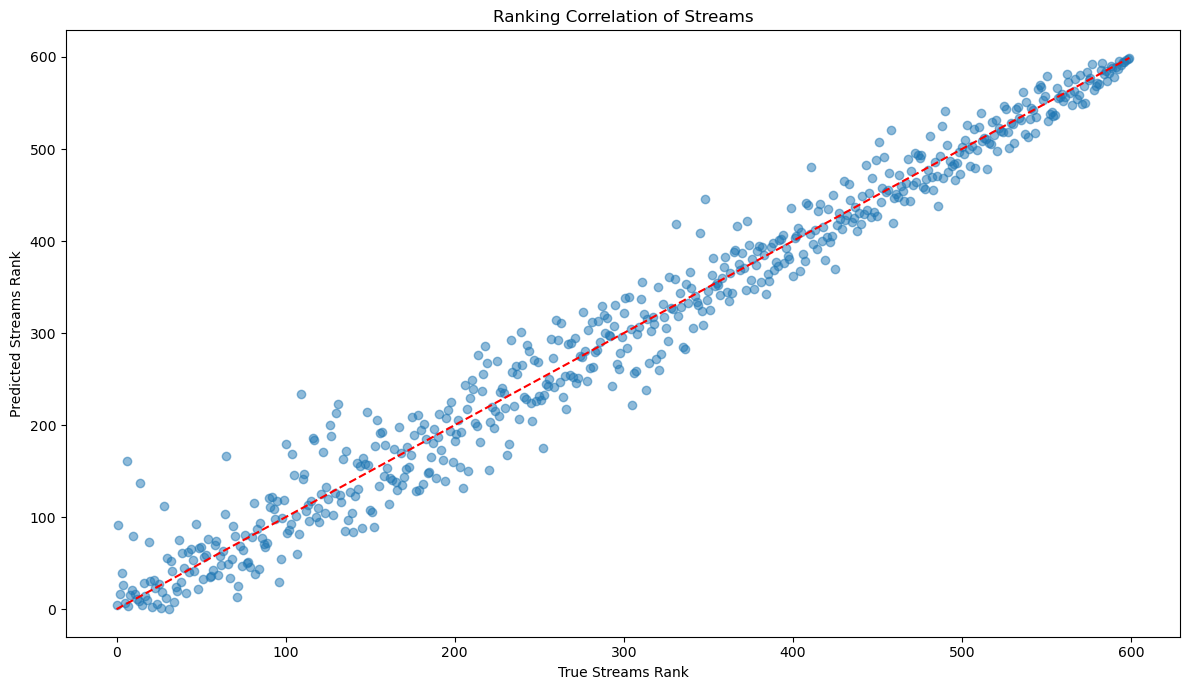

In [36]:
# Visualization of True vs Predicted Streams
true_streams_rank = np.argsort(np.argsort(y_test))
pred_streams_rank = np.argsort(np.argsort(y_pred))

plt.figure(figsize=(12, 7))
plt.scatter(true_streams_rank, pred_streams_rank, alpha=0.5)
plt.plot([min(true_streams_rank),max(true_streams_rank)], 
         [min(true_streams_rank),max(true_streams_rank)], 
         color='red', linestyle='--')
plt.xlabel('True Streams Rank')
plt.ylabel('Predicted Streams Rank')
plt.title('Ranking Correlation of Streams')
plt.tight_layout()
plt.show()

# **Evaluation**
<a id="5"></a>

In [37]:
models = [
    (best_linreg_model, 'Linear Regression'),
    (best_bagging_model, 'Bagging'),
    (best_gradient_boost_model, 'XG Boost'),
    (best_rf_model, 'Random Forest')
]

In [38]:
def evaluate_model(model, X_test, y_test, model_name):
    # Measure execution time
    start_time = time.time()
    y_pred = model.predict(X_test)
    execution_time = time.time() - start_time
    
    return {
        'Model': model_name,
        'R² Score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MSE': mean_squared_error(y_test, y_pred),
        'Execution Time (s)': execution_time
    }

# Run evaluation for all models
results = []
for model, name in models:
    results.append(evaluate_model(model, X_test, y_test, name))

# Create comparison DataFrame
results_df = pd.DataFrame(results).set_index('Model')
print(results_df)

                   R² Score       MAE      RMSE       MSE  Execution Time (s)
Model                                                                        
Linear Regression  0.325534  0.349406  0.816010  0.665872            0.000000
Bagging            0.844639  0.057835  0.391640  0.153382            0.065944
XG Boost           0.893855  0.066774  0.323717  0.104792            0.004984
Random Forest      0.808262  0.094124  0.435081  0.189295            0.040059


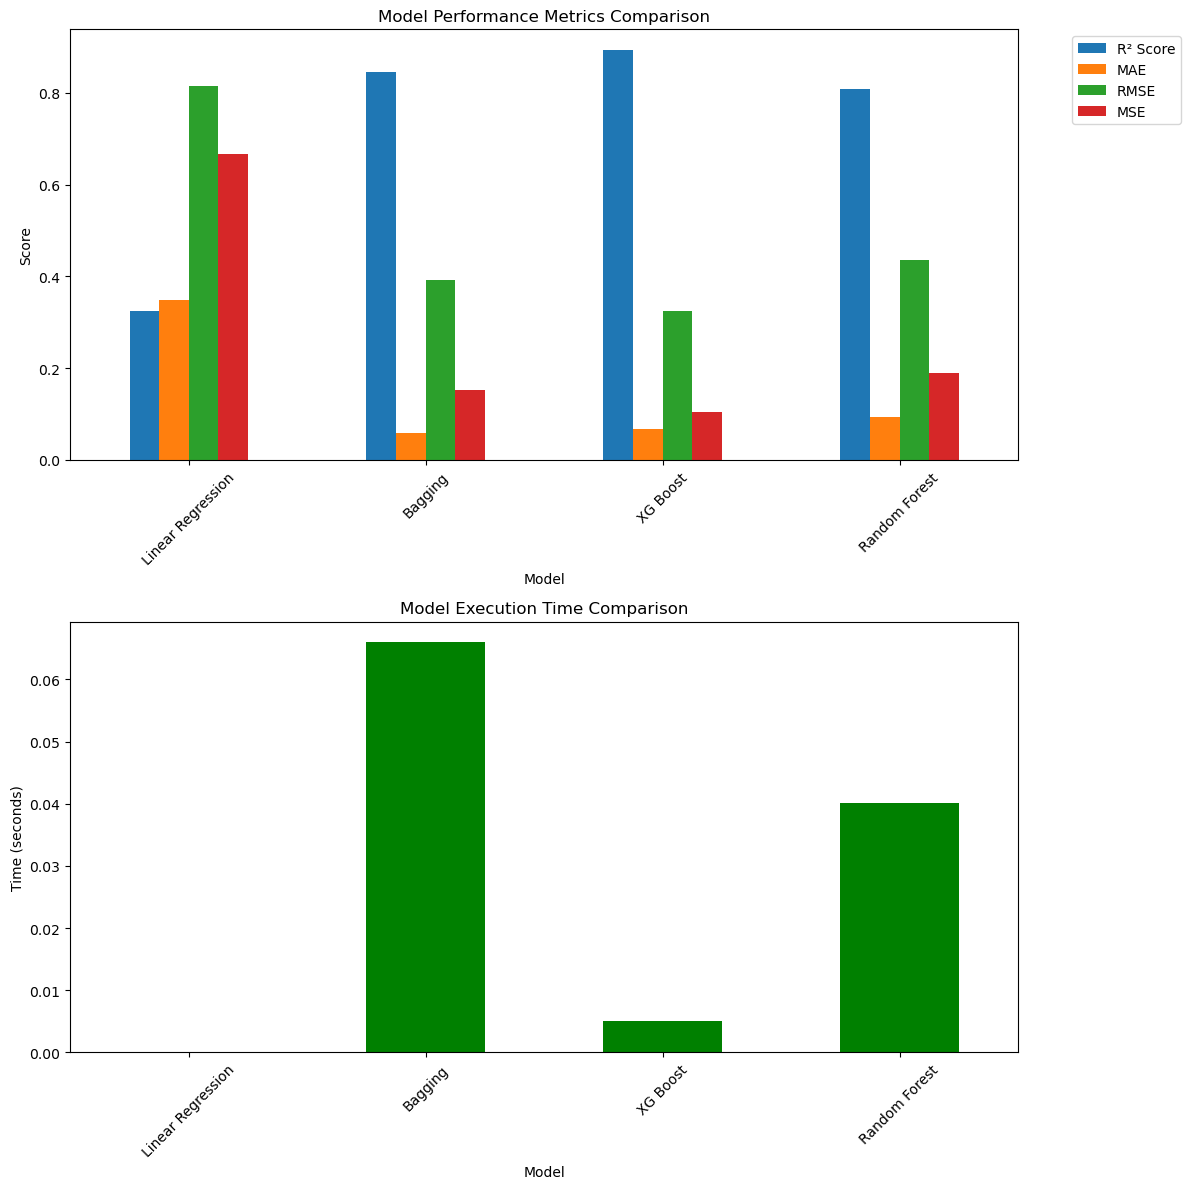


Detailed Performance Metrics:
                   R² Score     MAE    RMSE     MSE  Execution Time (s)
Model                                                                  
Linear Regression    0.3255  0.3494  0.8160  0.6659              0.0000
Bagging              0.8446  0.0578  0.3916  0.1534              0.0659
XG Boost             0.8939  0.0668  0.3237  0.1048              0.0050
Random Forest        0.8083  0.0941  0.4351  0.1893              0.0401


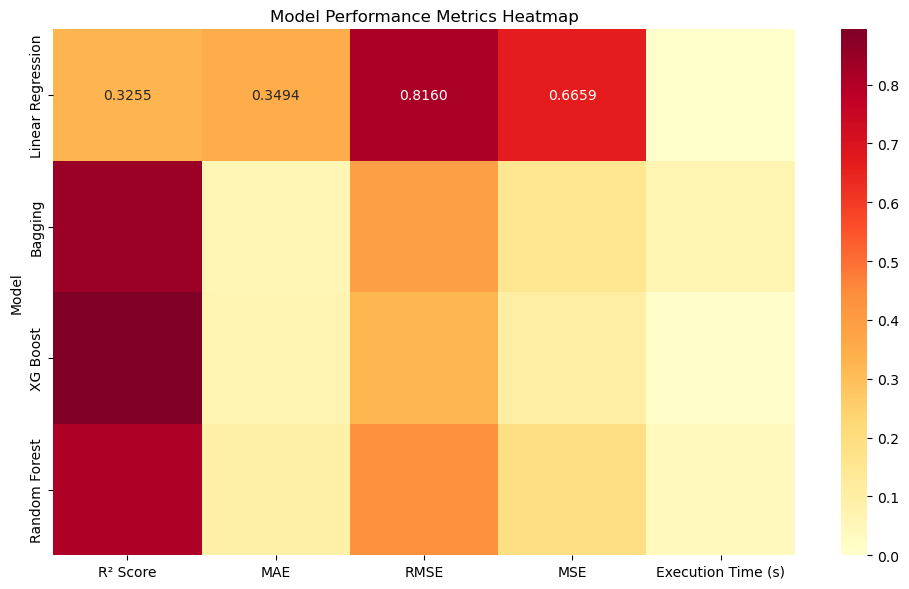

In [39]:
# Visualization
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Error metrics plot
error_metrics = ['R² Score', 'MAE', 'RMSE', 'MSE']
results_df[error_metrics].plot(kind='bar', ax=axes[0])
axes[0].set_title('Model Performance Metrics Comparison')
axes[0].set_ylabel('Score')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(axes[0].get_xticklabels(), rotation=45)

# Execution time plot
results_df['Execution Time (s)'].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Model Execution Time Comparison')
axes[1].set_ylabel('Time (seconds)')
plt.setp(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Performance Metrics:")
print(results_df.round(4))

# Create a heatmap of the metrics
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap='YlOrRd', fmt='.4f')
plt.title('Model Performance Metrics Heatmap')
plt.tight_layout()
plt.show()